# Régression logistique - Titanic dataset (Python)

## Titanic survivor 

### Step 1 - Importer les librairies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
from warnings import filterwarnings
filterwarnings('ignore') 

### Step 2 - Importer les données

In [4]:
# sns.get_dataset_names()

# dataframe proposé par la librairie seaborn

In [5]:
# df_titanic = sns.load_dataset('titanic')
# df_titanic.head()

In [6]:
df_titanic = pd.read_csv("Titanic-Dataset.csv")

In [7]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


ON OBSERVE DES VALEURS MANQUANTES. NOUS ALLONS FAIRE UN NETTOYAGE PLUS BAS ET ADAPTER LES TYPES DE NOS VARIABLES

### Step 3 - Analyse exploratoire des données

commencons une analyse exploratoires de nos données

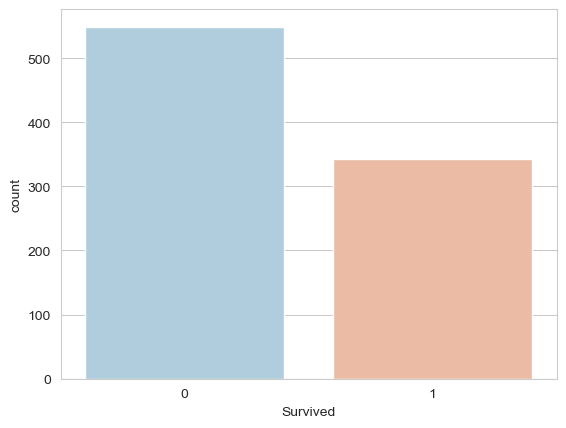

In [9]:
# On va faire un countplot pour voir ceux qui ont survecu ou non

sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df_titanic, palette='RdBu_r');

On observe que un peu plus de 300 personnes ont survecu (en orange) et un peu plus de 500 personnes n'ont pas survecu (en bleu).

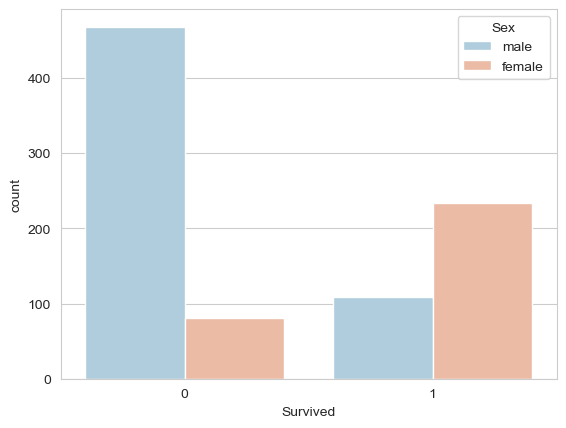

In [10]:
# On fais toujour la meme chose, un countplot pour voir ceux qui ont survecu ou non en fonction du sexe

sns.countplot(x='Survived', hue='Sex', data=df_titanic, palette='RdBu_r');

Les personnes qui n'auront pas survecu il y a beaucoup plus d'hommes que les femmes et les personnes qui auront survecu il y'a beaucoup de femmes que les hommes

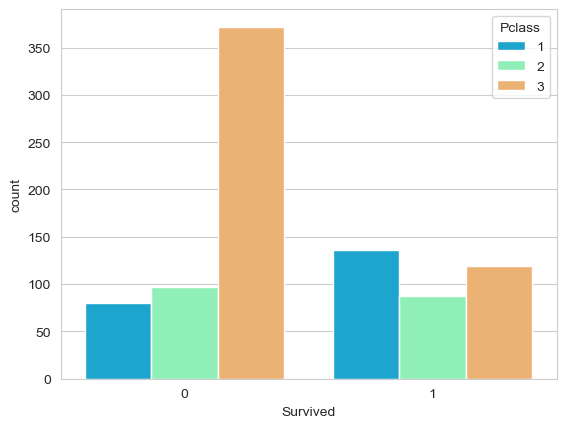

In [11]:
# Countplot pour voir ceux qui ont survecu ou non en fonction des classes d'embarquement

sns.countplot(x='Survived', hue='Pclass', data=df_titanic, palette='rainbow');

Il y'a beaucoup de personnes qui n'ont pas survecu en 3ème classe et plus de personnes on servecu en 1ère classe. donc il serait interssant d'etre en 1ère classe 

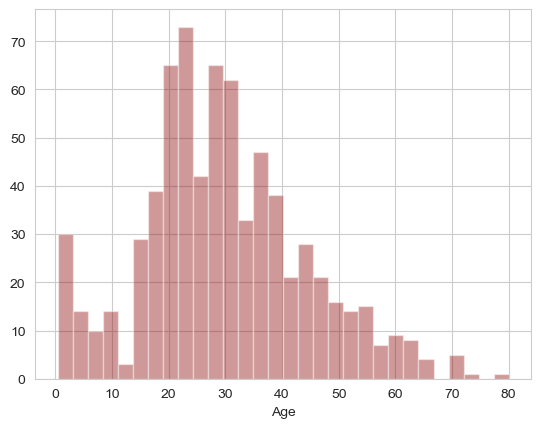

In [12]:
# Histogramme de l'age

sns.distplot(df_titanic['Age'],kde=False, color='darkred', bins=30);

On observe ici qu'il y a pas mal de bébé et beaucoup de passagés agés de 20 à 30 ans

In [13]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


On a 891 entré (de passagés) et on observe des valeurs nulles a certains endroit (variables). 
pour faire la regression logistique, l'alogorithme prend uniquement les données chiffrés ou numerique

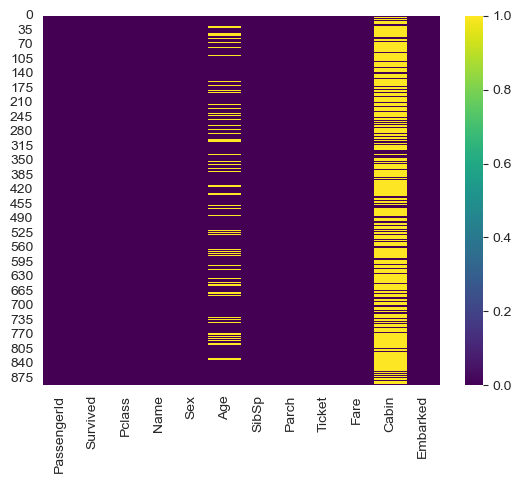

In [14]:
# Pour visualiser les valeurs nulles

sns.heatmap(df_titanic.isnull(), cmap='viridis'); # yticklabels=False, cbar=False

Les parties en jaune representes les valeurs nulles

## DATA cleaning ou Nettoyage de données

Nous voulons remplir les données d'age manquantes au lieu de simplement supprimer les lignes de données manquantes. Une facon de le faire est de remplir l'age moyen de tous les passagers (imputation). Cependant, nous pouvons etre plus intelligents à ce sujet et verifier l'age moyen par classe de passagers. par exemple : 

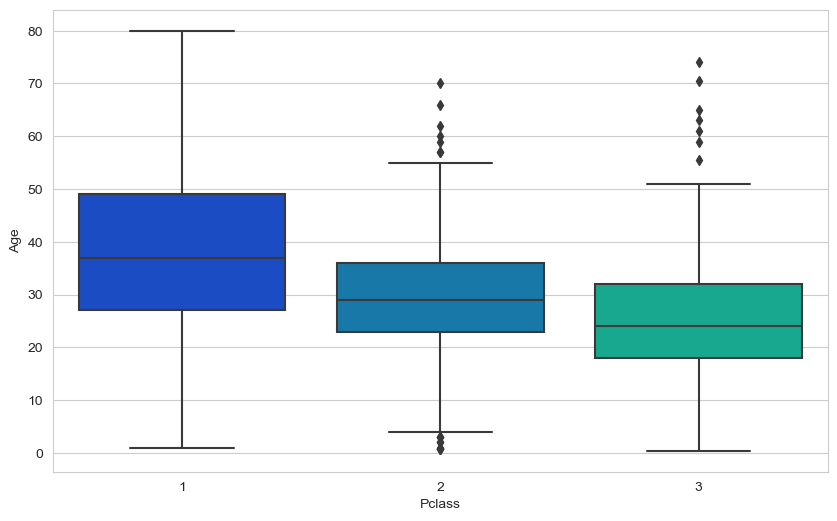

In [15]:
# Boxplot pour observer l'age moyen des passagers par classe

plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass', y='Age', data=df_titanic, palette='winter');

L'age moyen de la 1ère classe est de 37 ans


L'age moyen de la 2ère classe est de 29 ans 


L'age moyen de la 3ère classe est de 24 ans 

Nous pouvons voir que les passagers les plus riches des classes superieurs ont tendanceà etre plus agés, ce que est logique. Nous utiliserons ces valeurs d'age moyen pour les imputers en fonction de la classe P pour l'age.

In [16]:
# Créeons une fonction pour cela

def imput_age(cols):
    Age = cols[0]       # On regarde ca classe
    Pclass = cols[1]
    
    if pd.isnull(Age):     # si l'age est nulle
        
        if Pclass == 1:
            return 37           # on lui met 37 ans
        
        elif Pclass == 2:
            return 29           # si non 29 ans ainsi de suite
        
        else:
            return 24
        
    else:
        return Age
    

Nous pouvons appliquer notre fonction maintenant

In [17]:
# Dans la colonne 0 on met l'age et dans la colonne 1 on met la pclass domme dans la fonction

df_titanic['Age'] = df_titanic[['Age', "Pclass"]].apply(imput_age, axis=1)

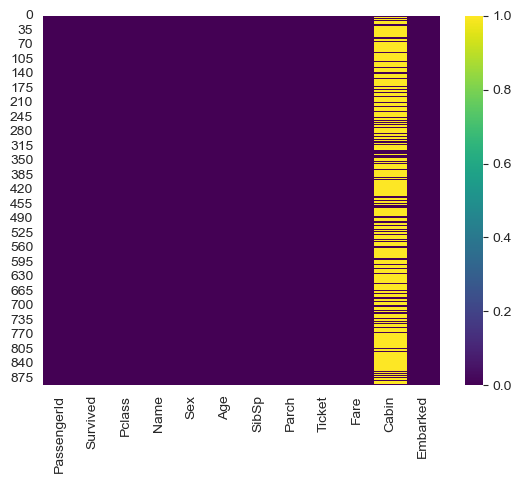

In [18]:
# Regardons ce que sa donne

sns.heatmap(df_titanic.isnull(), cmap='viridis'); # yticklabels=False, cbar=False

Concernant la colonne desck plus de 50% de ses valeurs sont manquantes et les valeurs sont des chaines de caractere ce qui n'est approprié a l'algorythme pour la regression logistique. donc carrement surpromer la colonne.

In [19]:
# suppresion de la variables "deck"

df_titanic.drop('Cabin', axis=1, inplace=True)

In [20]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
df_titanic.dropna(inplace=True)

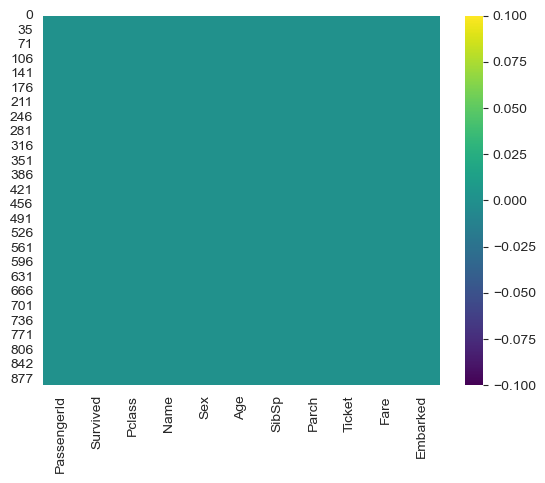

In [22]:
sns.heatmap(df_titanic.isnull(), cmap='viridis'); # yticklabels=False, cbar=False

### Conversion des caracterique categorielle ou changer les types des variables en float ou int

Nous devons convertir des caracteristiques en variables factices à l'aide de pandas! sinon, notre algorithme d'apprentissage automatique ne sera pas en mesure de prendre directement ces fonctionnalités comme entrées

In [23]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [24]:
pd.get_dummies(df_titanic['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [25]:
# la fonction get_dummies permet de passer les types objets en valeurs numerique 

Sex = pd.get_dummies(df_titanic['Sex'], drop_first=True)
print(Sex)

# drop_first permet de suprimer la première colonne et garder la deuxième. ici homme est 1 et femme réprésente 0

     male
0       1
1       0
2       0
3       0
4       1
..    ...
886     1
887     0
888     0
889     1
890     1

[889 rows x 1 columns]


In [26]:
pd.get_dummies(df_titanic['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [27]:
# la fonction get_dummies permet de passer les types objets en valeurs numerique 

Embarked = pd.get_dummies(df_titanic['Embarked'], drop_first=True)
print(Embarked)

# drop_first permet de suprimer la première colonne et garder les deux autres colonnes. Ici par exemple la premiere ligne(0)
# la personne a embarqué au port S; la deuxieme ligne(1) la personne à embarquer au port C et la derniere ligne(890) 
# la personne à embarquer au port Q

     Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
886  0  1
887  0  1
888  0  1
889  0  0
890  1  0

[889 rows x 2 columns]


In [28]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [29]:
df_titanic.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [30]:
df_titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [31]:
df_titanic = pd.concat([df_titanic, Sex, Embarked], axis=1)

In [32]:
df_titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [33]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   male         889 non-null    uint8  
 8   Q            889 non-null    uint8  
 9   S            889 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.2 KB


Super! Nos données sont enfin pretes pour notre modèle. nous pouvont travailler avec l'algorithme maintenant

### Step 4 - Preparons des données dans le train et le test

commencons par séparer nos données en un ensemble de formation et un ensemble de tests

### Train Test Split ( séparons nos données en train et test )

In [34]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(df_titanic.drop('Survived', axis=1),
                                                    df_titanic['Survived'], test_size=0.30, random_state=101)


# Pour les X on prends toute la base de données sauf le "survived" qui represente le y
# Axis=1 c'est pour preciser que c'est la colonne "survived"
# test_size=0.30 veut dire le Test est de 30% et le Train est de 70%

In [36]:
print(x_train)

     PassengerId  Pclass   Age  SibSp  Parch     Fare  male  Q  S
807          808       3  18.0      0      0   7.7750     0  0  1
651          652       2  18.0      0      1  23.0000     0  0  1
2              3       3  26.0      0      0   7.9250     0  0  1
690          691       1  31.0      1      0  57.0000     1  0  1
196          197       3  24.0      0      0   7.7500     1  1  0
..           ...     ...   ...    ...    ...      ...   ... .. ..
576          577       2  34.0      0      0  13.0000     0  0  1
840          841       3  20.0      0      0   7.9250     1  0  1
338          339       3  45.0      0      0   8.0500     1  0  1
524          525       3  24.0      0      0   7.2292     1  0  0
865          866       2  42.0      0      0  13.0000     0  0  1

[622 rows x 9 columns]


### Step 5 - Construisons notre modele de regression logistique pour la classification

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
# On créé notre model qu'on va mettre dans logmodel
# On prend aussi le solver qui est une ligne lineaire

logmodel = LogisticRegression(solver='liblinear')

### Step 6 - Entrainer le modele (Train the model)

In [39]:
logmodel.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

Passons à l'evaluation de notre modele

### Step 7 - Evaluation du modele

In [40]:
# Pour évaluer le modele on va faire un .predict() avec que les x_test

predictions = logmodel.predict(x_test)

Nous pouvons verifier la précision, le rappel, le score f1 à l'aide du rapport de classification

In [41]:
# Et maintenant on va comparer les predictions obtenues avec les y_test qui est la vrai valeur si la 
# personne a survecu ou non

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



On observe la precision, le recal, le f1-score et le support

accuracy est de 82% ce qui signifie le modele n'est trop elevé

In [43]:
from sklearn.metrics import confusion_matrix

print('confusion_martix:\n', confusion_matrix(y_test, predictions))


# tn, fp, fn, tp = confusion_matrix(y_test, predictions).reval()
# print(tn, fp, fn, tp)

# tn = true negative , fp= false positive, fn = false negative, tp = true positive

confusion_martix:
 [[151  12]
 [ 36  68]]


On obtient la martix de confusion, la premiere valeur de du 1er crochet est le true négative et la deuxième valeur de du 1er crochet toujour est le false positive

la premiere valeur de du 2ème crochet est le false négative et la deuxième valeur de du 2ème crochet est le true positive qui est ceux qui on survecu

### La courbe roc

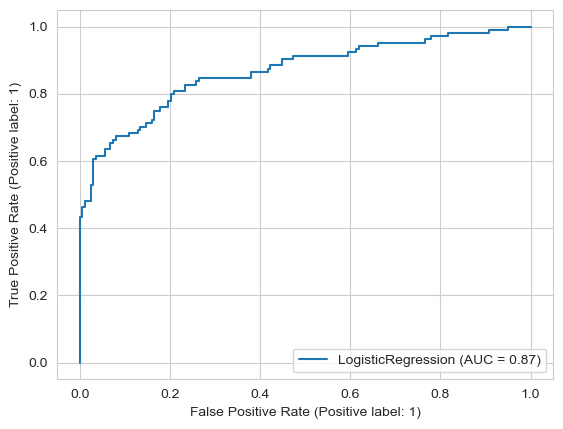

In [44]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(logmodel, x_test, y_test)
plt.show()